In [403]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [404]:
df=pd.read_csv("../input/adult-census-income/adult.csv")
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Brief info about dataset

In [405]:
df.shape

(32561, 15)

In [406]:
df.size

488415

## Clean the data

In [407]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

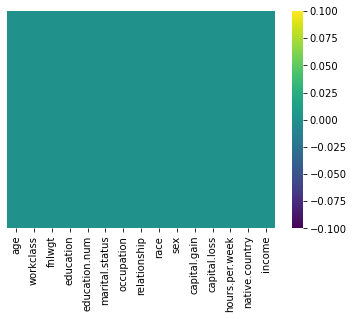

In [408]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

## No single null value

### Remove '?' from the dataset

In [409]:
df=df[df["workclass"]!='?']

In [410]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [411]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## Find the relation between income and workclass

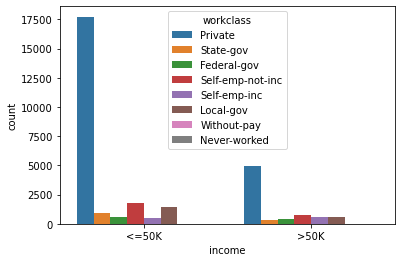

In [412]:
sns.countplot("income",hue="workclass",data=df)

## Private workclass seems more

In [413]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


(array([4938., 5687., 5890., 6056., 3862., 2453., 1304.,  363.,  116.,
          56.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

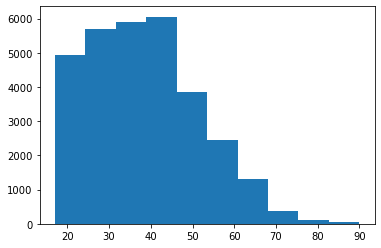

In [414]:
plt.hist(df["age"])

## people are more around age 40-50

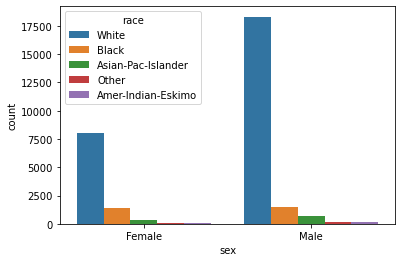

In [415]:
sns.countplot("sex",hue="race",data=df)

### White men and female are more and majority are white male

In [416]:
education=df["education"].unique()
print(education)

['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


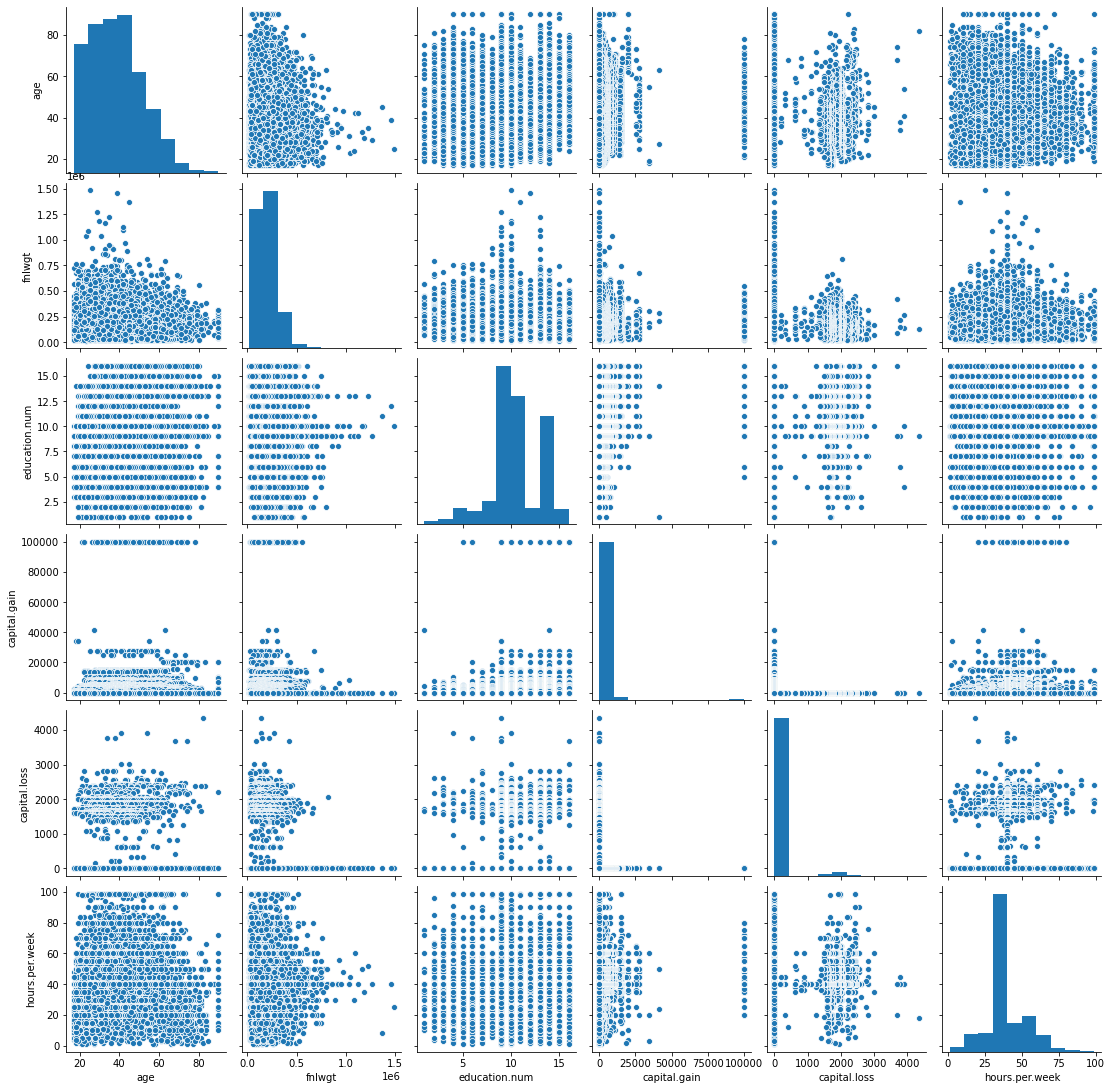

In [417]:
sns.pairplot(data=df)

In [418]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [419]:
df["age"].describe()

count    30725.000000
mean        38.439512
std         13.119665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [420]:
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

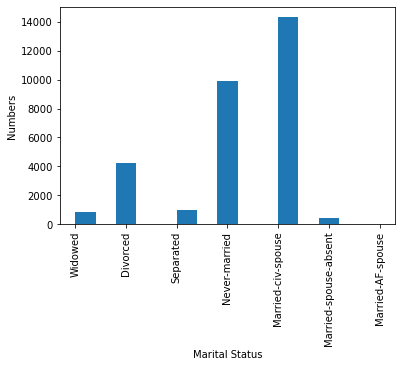

In [421]:
plt.hist(df["marital.status"],bins=15)
plt.xticks(rotation='vertical')
plt.xlabel("Marital Status")
plt.ylabel("Numbers")
plt.show()

In [422]:
df=df[df["occupation"]!='?']

In [423]:
df["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [424]:
df["occupation"].max()

'Transport-moving'

### Transport-moving is maximum

### Which occupation people do most?

In [425]:
total_ao=df["age"].groupby(df["occupation"])
total_ao.sum()


occupation
Adm-clerical         139356
Armed-Forces            272
Craft-repair         159990
Exec-managerial      171460
Farming-fishing       40964
Handlers-cleaners     44067
Machine-op-inspct     75506
Other-service        115159
Priv-house-serv        6217
Prof-specialty       167743
Protective-serv       25281
Sales                136342
Tech-support          34357
Transport-moving      64196
Name: age, dtype: int64

## Plot between age and occupation

In [426]:
occupation=[occupation for occupation,df in df.groupby('occupation')]
occupation

['Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving']

In [427]:
x=df["occupation"].unique()
print(x.tolist())

## It won't come in order

['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty', 'Other-service', 'Adm-clerical', 'Craft-repair', 'Transport-moving', 'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

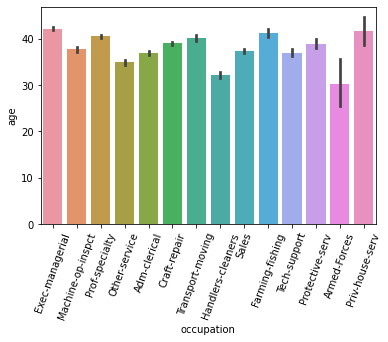

In [428]:
sns.barplot(x='occupation', y='age', data=df)

plt.xticks(rotation=70)


In [429]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

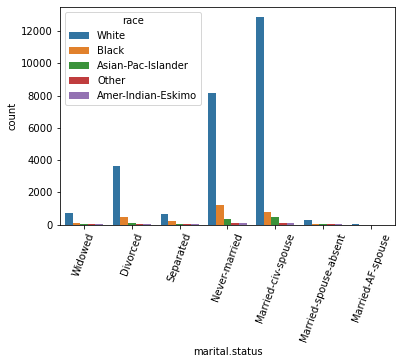

In [430]:
sns.countplot("marital.status",hue="race",data=df)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

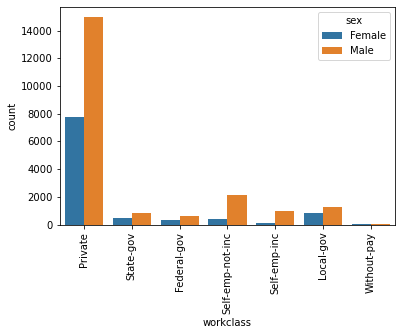

In [431]:
sns.countplot("workclass",hue="sex",data=df)
plt.xticks(rotation=90)

In [432]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [433]:
total=df["age"].groupby(df["workclass"]).sum()
total


workclass
Federal-gov          40887
Local-gov            87385
Private             835158
Self-emp-inc         51355
Self-emp-not-inc    114268
State-gov            51188
Without-pay            669
Name: age, dtype: int64

### people of more agegroup are likely to switct to private jobs


In [434]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [435]:
total_population=df["age"].groupby(df["sex"]).sum()
total_population

sex
Female    366268
Male      814642
Name: age, dtype: int64

In [436]:
total_population=df["age"].groupby(df["race"]).sum()
total_population

race
Amer-Indian-Eskimo      10507
Asian-Pac-Islander      36843
Black                  109998
Other                    8380
White                 1015182
Name: age, dtype: int64

In [437]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [438]:
income_stat=df["hours.per.week"].groupby(df['sex']).sum()
income_stat

sex
Female    366966
Male      890915
Name: hours.per.week, dtype: int64

(array([  174.,   546.,  1703.,   942.,  1372., 16607.,  2479.,  3515.,
          863.,  1744.,   368.,    83.,   182.,    39.,   101.]),
 array([ 1.        ,  7.53333333, 14.06666667, 20.6       , 27.13333333,
        33.66666667, 40.2       , 46.73333333, 53.26666667, 59.8       ,
        66.33333333, 72.86666667, 79.4       , 85.93333333, 92.46666667,
        99.        ]),
 <a list of 15 Patch objects>)

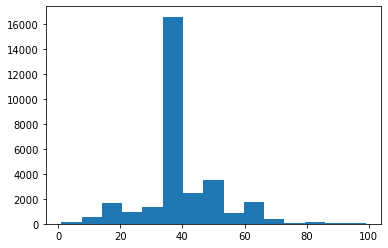

In [439]:
plt.hist(df["hours.per.week"],bins=15)

In [440]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [441]:
total_education_stat=df["education.num"].groupby(df["education"]).sum()
total_education_stat

education
10th             4986
11th             7392
12th             3144
1st-4th           312
5th-6th           909
7th-8th          2292
9th              2315
Assoc-acdm      12240
Assoc-voc       14531
Bachelors       67366
Doctorate        6368
HS-grad         89712
Masters         23450
Preschool          46
Prof-school      8370
Some-college    67750
Name: education.num, dtype: int64

In [442]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [443]:
df["capital.loss"].max()

4356

In [444]:
df["capital.loss"].describe()

count    30718.000000
mean        88.910216
std        405.657203
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

#### Which degree does people have the most?

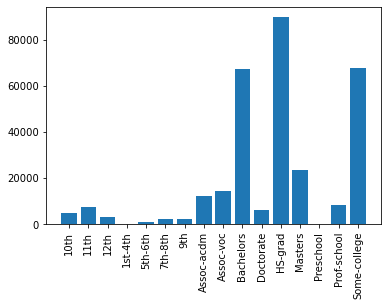

In [445]:
edu=df.groupby('education')
edu_num=edu.sum()['education.num']
e_num=[education for education ,df in edu]
plt.bar(e_num,edu_num)
plt.xticks(e_num,rotation='vertical',size=10)
plt.show()




### Which sex(Male|Female) has the most capital loss ?


In [446]:
cap_loss=df["capital.loss"].groupby(df["sex"]).sum()
cap_loss


sex
Female     608897
Male      2122247
Name: capital.loss, dtype: int64

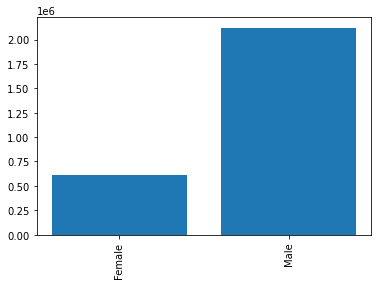

In [447]:
ed=df.groupby('sex')
edu_nu=ed.sum()['capital.loss']
e_nu=[sex for sex ,df in ed]
plt.bar(e_nu,edu_nu)
plt.xticks(e_nu,rotation='vertical',size=10)
plt.show()




#### Male has more capital loss 

## People of which occupation tends to have more capital loss?

In [448]:
people_loss=df["capital.loss"].groupby(df["occupation"]).sum()
people_loss

occupation
Adm-clerical         229195
Armed-Forces           1887
Craft-repair         362619
Exec-managerial      564517
Farming-fishing       62697
Handlers-cleaners     62521
Machine-op-inspct    123536
Other-service        126036
Priv-house-serv        3196
Prof-specialty       563617
Protective-serv       50839
Sales                358797
Tech-support          91562
Transport-moving     130125
Name: capital.loss, dtype: int64

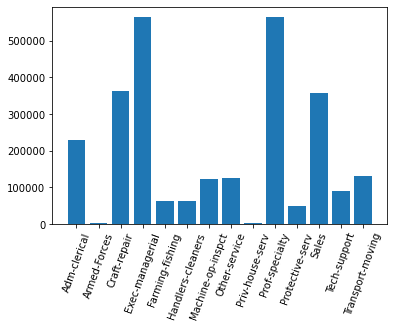

In [449]:
e=df.groupby('occupation')
edu_n=e.sum()['capital.loss']
e_n=[occupation for occupation ,df in e]
plt.bar(e_n,edu_n)
plt.xticks(e_n,rotation=70,size=10)
plt.show()




### Exec-managerial and Prof-specialty 

In [451]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [ ]:
### Thanks 

### Thanks 